In [2]:
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)

In [26]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w), 2)**2

def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        rd_id = np.random.permutation(N) #Shuffle -  de dam bao tinh ngau nhien
        for i in range(N):
            count += 1
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:
                    return w
                w_last_check = w_this_check
    return w

w_init = np.array([[2], [1]])
w_m = SGD(w_init, grad, .1)
# print('Solution found by SGD: ', w_m[-1].T, 'Lens: ', len(w_m))

Solution found by SGD:  [[3.98631606 2.96747399]] Lens:  3401


In [5]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 + b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

MovieWriter imagemagick unavailable; using Pillow instead.


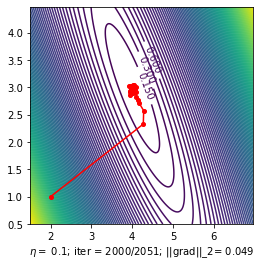

In [27]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif3(eta):
    w = SGD(w_init, grad, eta)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            anomlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_lr[0], w_lr[1], 'go')
        else:
            animlist = plt.plot([w[(ii-1)*50][0], w[ii*50][0]], [w[(ii-1)*50][1], w[ii*50][1]], 'r-')
        animlist = plt.plot(w[ii*50][0], w[ii*50][1], 'ro', markersize = 4)
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii*50, len(w))
        xlabel += '; ||grad||_2= %.3f' %np.linalg.norm(grad(w[ii*50]))
        ax.set_xlabel(xlabel)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, len(w)//50), interval=100)
    fn = 'LR_SGD_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')
    
eta = .1
save_gif3(eta)

In [29]:
#loss function
loss = np.zeros((len(w_m), 1))
for i in range(len(w_m)):
    loss[i] = cost(w_m[i])

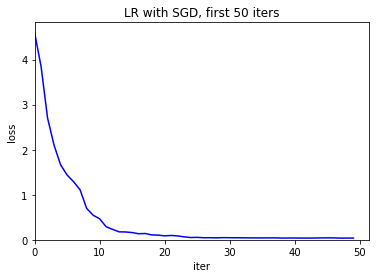

In [32]:
plt.plot(range(50), loss[:50], 'b')
plt.xlabel('iter')
plt.ylabel('loss')
plt.title('LR with SGD, first 50 iters')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()